## Census Report Kenya 2019. Visualization of Initial Summary Report

The 2019 Kenya Population and Housing Census Volume I report is the first in a series of census publications. 
It presents the distribution of the enumerated population by sex; number of households; and average household size, at national, county and sub-county levels. 
Also contained in the report is information on land area and population density, as per the administrative boundaries. 
Further work is ongoing to produce basic and in-depth analytical topical reports on the Census.

In this project, I set out to visualize the data for quicker and easier comprehension.

In [266]:
%pylab inline
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [267]:
df = pd.read_excel('census.xlsx')

### 1. Distribution of Population by Sex and County:

In [268]:
df.head(20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Distribution of Population by County,NaN,NaN,NaN,NaN,NaN
1,Table 2. 2: Distribution of Population by Sex ...,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,Sex,NaN,NaN
3,National/ County,NaN,NaN,NaN,NaN,Total
4,NaN,Male,Female,Intersex,NaN,NaN
5,Kenya,23548056,24014716,1524,47564296.0,NaN
6,County,NaN,NaN,NaN,NaN,NaN
7,Mom bas a…………..…,610257,598046,30,1208333.0,NaN
8,Kwale……………..……,425121,441681,18,866820.0,NaN
9,Kilifi………………..……,704089,749673,25,1453787.0,NaN


The raw data taken from a PDF needs clean to NaN rows/columns, rename columns and remove unnecessary info for better visualization.

In [269]:
# renaming columns
df.columns = ['County', 'Male', 'Female', 'Intersex', 'Total', 'NaN']

In [270]:
df.head()

,County,Male,Female,Intersex,Total,NaN
0,Distribution of Population by County,NaN,NaN,NaN,NaN,NaN
1,Table 2. 2: Distribution of Population by Sex ...,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,Sex,NaN,NaN
3,National/ County,NaN,NaN,NaN,NaN,Total
4,NaN,Male,Female,Intersex,NaN,NaN


In [271]:
# delete column called NaN
df = df.drop(columns='NaN')  

In [272]:
# delete first 6 rows since we dont need them
df = df.drop([0,1,2,3,4,5,6], axis=0) 
# df = df.iloc[6:,]  this will also delete first 6 rows

In [273]:
df.head() # data looks cleaner now except for the county names

,County,Male,Female,Intersex,Total
7,Mom bas a…………..…,610257,598046,30,1208333.0
8,Kwale……………..……,425121,441681,18,866820.0
9,Kilifi………………..……,704089,749673,25,1453787.0
10,Tana River………….…,158550,157391,2,315943.0
11,Lamu……………….….,76103,67813,4,143920.0


In [274]:
# rename columns elements
df['County'] = df['County'].replace({'Mom bas a…………..…': 'Mombasa', 'Kwale……………..……': 'Kwale', 
                                     'Kilifi………………..……': 'Kilifi', 'Tana River………….…': 'Tana River', 
                                    'Lamu……………….….': 'Lamu', 'Taita/Taveta……..….…':'Taita/Taveta',
                                     'Garissa………………..':'Garissa', 'Wajir……………….……':'Wajir',
                                     'Mandera…………': 'Mandera', 'Mars abit…….…': 'Marsabit', 'Is iolo……….…….……':'Isiolo',
                                    'Meru……………………': 'Meru', 'Tharaka-Nithi…………': 'Tharaka-Nithi',
                                    'Embu………………….': 'Embu', 'Kitui……………………': 'Kitui', 'Machakos ………….….': 'Machakos',
                                    'Makueni……………….': 'Makueni', 'Nyandarua……………': 'Nyandarua',
                                    'Nyeri……………………': 'Nyeri', 'Kirinyaga………………': 'Kirinyaga', "Murang'a………………": "Murang'a",
                                    'Kiambu………………..': 'Kiambu', 'Turkana……………….': 'Turkana', 'West Pokot……………': 'West Pokot',
                                    'Samburu………………': 'Samburu', 'Trans Nzoia…………..': 'Trans Nzoia',
                                    'Uasin Gishu………….': 'Uasin Gishu', 'Elgeyo/Marakwet……..':'Elgeyo/Marakwet',
                                    'Nandi………………….': 'Nandi', 'Baringo………………..': 'Baringo', 'Laikipia…………………': 'Laikipia',
                                    'Nakuru…………………': 'Nakuru', 'Narok…………………': 'Narok', 'Kajiado…………………': 'Kajiado', 'Kericho………..………': 'Kericho',
                                    'Bomet…………………': 'Bomet', 'Kakamega……………':'Kakamega', 'Vihiga………………….': 'Vihiga',
                                    'Bungoma…………..…': 'Bungoma', 'Busia…………...……..': 'Busia', 'Siaya…………….…….': 'Siaya',
                                    'Kisumu………………..': 'Kisumu', 'Homa Bay…………….': 'Homa Bay', 'Migori………………….': 'Migori',
                                    'Kisii……………………': 'Kisii','Nyam ira……………….': 'Nyamira', 'Nairobi City……..…….': 'Nairobi City',})

In [276]:
df.head()

,County,Male,Female,Intersex,Total
7,Mombasa,610257,598046,30,1208333.0
8,Kwale,425121,441681,18,866820.0
9,Kilifi,704089,749673,25,1453787.0
10,Tana River,158550,157391,2,315943.0
11,Lamu,76103,67813,4,143920.0


In [36]:
# change float elements of a column into integers
df['Total'] = df['Total'].astype(int) 
df['Male'] = df['Male'].astype(int)
df['Female'] = df['Female'].astype(int)
df['Intersex'] = df['Intersex'].astype(int)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 7 to 53
Data columns (total 5 columns):
County      47 non-null object
Male        47 non-null int32
Female      47 non-null int32
Intersex    47 non-null int32
Total       47 non-null int32
dtypes: int32(4), object(1)
memory usage: 1.5+ KB


In [277]:
# get a percentage of male population and add its column which we will use in plotting
df["Percentage of Male"] = df["Male"].div(df["Total"]/100)

In [278]:
df.head()

,County,Male,Female,Intersex,Total,Percentage of Male
7,Mombasa,610257,598046,30,1208333.0,50.504
8,Kwale,425121,441681,18,866820.0,49.0437
9,Kilifi,704089,749673,25,1453787.0,48.4314
10,Tana River,158550,157391,2,315943.0,50.1831
11,Lamu,76103,67813,4,143920.0,52.8787


In [279]:
# round off the percentages to one decimal place
df['Percentage of Male'] = df['Percentage of Male'].apply(lambda x: round(x, 1) if type(x) is float else x)

In [280]:
df.head()

,County,Male,Female,Intersex,Total,Percentage of Male
7,Mombasa,610257,598046,30,1208333.0,50.5
8,Kwale,425121,441681,18,866820.0,49.0
9,Kilifi,704089,749673,25,1453787.0,48.4
10,Tana River,158550,157391,2,315943.0,50.2
11,Lamu,76103,67813,4,143920.0,52.9


In [281]:
# save a copy of the cleaned up csv file
df.to_csv('CensusCleaned.csv')

In [282]:
# get mean of the percentage of male population which I'll use in plotting
df['Percentage of Male'].mean()

49.66808510638298

## We are now ready to start plotting

#### How do male and female numbers rank per county?

The total enumerated population was 47,564,296 of which 23,548,056 were Males, 24,014,716 were Females and 1,524 were Intersex.
Females accounted for 50.5% of the total population. The population has grown to 47.6 Million in 2019 from 37.7 Million in 2009.
Let's see how males and females compare per county.

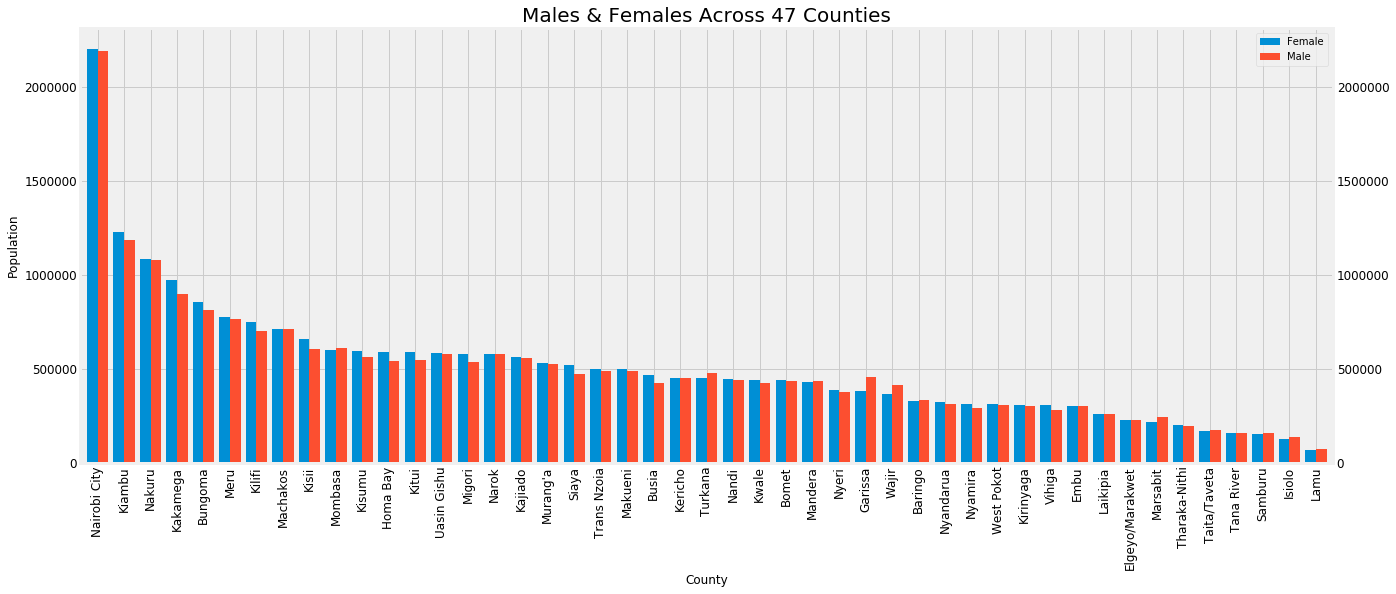

In [284]:
df.sort_values('Female', inplace=True, ascending = False)
df.plot(x = 'County', y = ['Female', 'Male'], kind = 'bar', width=0.8, figsize=(20, 8))
plt.xlabel('County', fontsize = 12)
plt.ylabel('Population', fontsize = 12)
plt.title('Males & Females Across 47 Counties', fontsize = 20)
plt.tick_params(labelsize=12, labelright=True)
plt.legend()
plt.show()

In most counties there are clearly more women than men

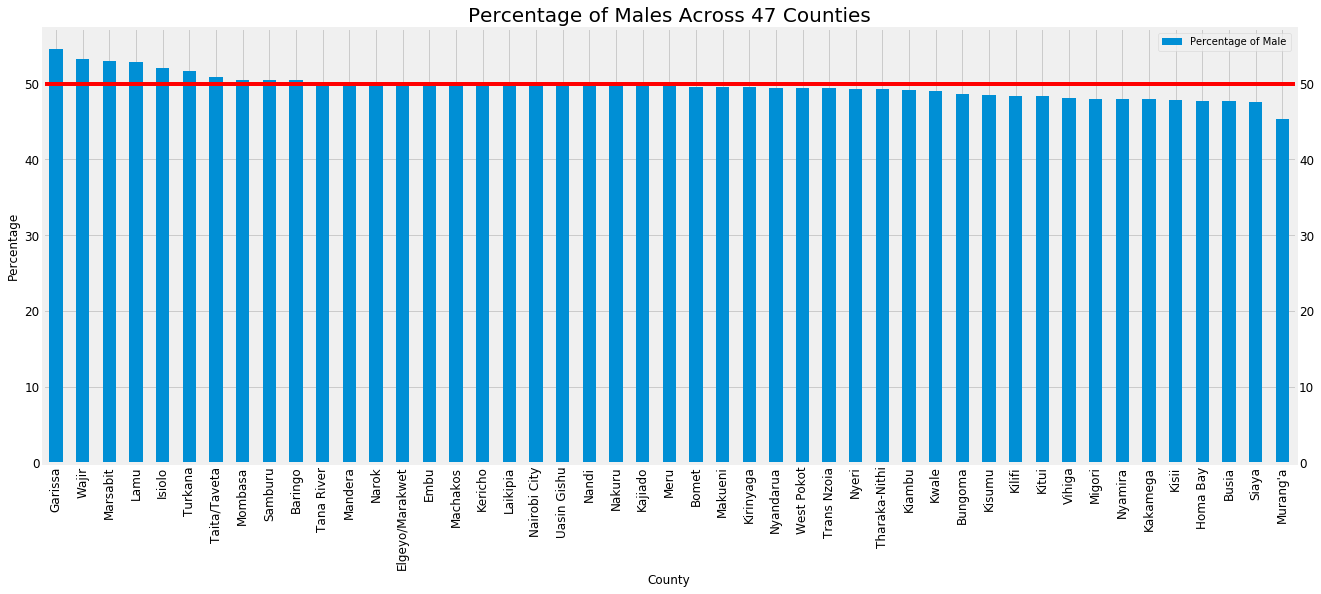

In [49]:
# plot percentage of male population with an line on y-axis to show the 50% mark
df.groupby('County')['Percentage of Male'].sum().sort_values(ascending = False).plot(kind='bar', width=0.5, figsize=(20, 8))
plt.xlabel('County', fontsize = 12)
plt.ylabel('Percentage', fontsize = 12)
plt.title('Percentage of Males Across 47 Counties', fontsize = 20)
plt.tick_params(labelsize=12, labelright=True)
plt.axhline(y=50, color='r', linestyle='-')
plt.legend()
plt.show()

29 counties from Uasin Gishu to Murang'a have more female than male persons with Murang'a having the least at 45.3% male population.

#### How are Intersex persons distributed across counties?
In this graph I used two different ranges on left and right y-axes without a need to standardise the data before plotting.

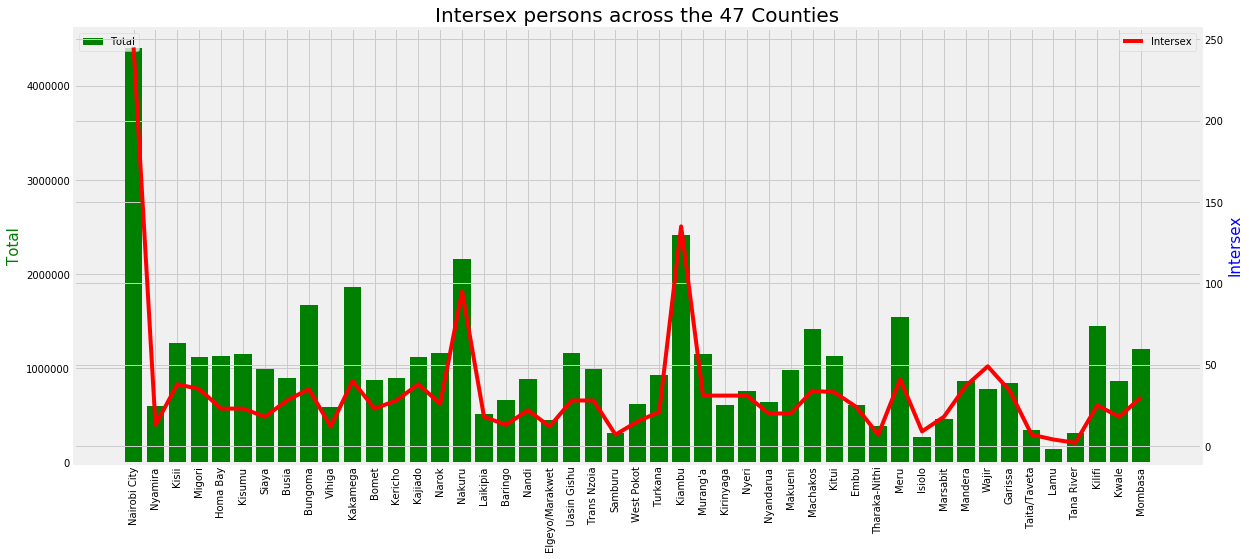

In [283]:
fig, ax = plt.subplots(figsize=(18,8))
ax2 = ax.twinx()
ax.bar(df['County'], df["Total"], color='g', label='Total', width=0.8)
ax2.plot(df['County'], df["Intersex"], color='r', label='Intersex')
ax.set_xticklabels(df['County'], rotation=90)
ax.legend(loc=2)
plt.title('Intersex persons across the 47 Counties', fontsize = 20)
plt.gca().invert_xaxis()
ax.set_ylabel('Total', color='g', fontsize = 15)
ax2.set_ylabel('Intersex', color='b', fontsize = 15)
plt.legend()
plt.show()

### 2. Distribution of Population, Number of Households and Average Household Size by County.
#### How do counties rank in terms of number of households and average household size?

In [285]:
household = pd.read_excel('household.xlsx')

In [286]:
# I cleaned up the data on excel first before loading it to Jupyter to go straight to visualization
household.head()

,County,Population,No. of Households,Ave. Household size
0,Mombasa,1190987,378422,3.1
1,Kwale,858748,173176,5.0
2,Kilifi,1440958,298472,4.8
3,Tana River,314710,68242,4.6
4,Lamu,141909,37963,3.7


#### How do counties compare in terms of numbers= of households? 

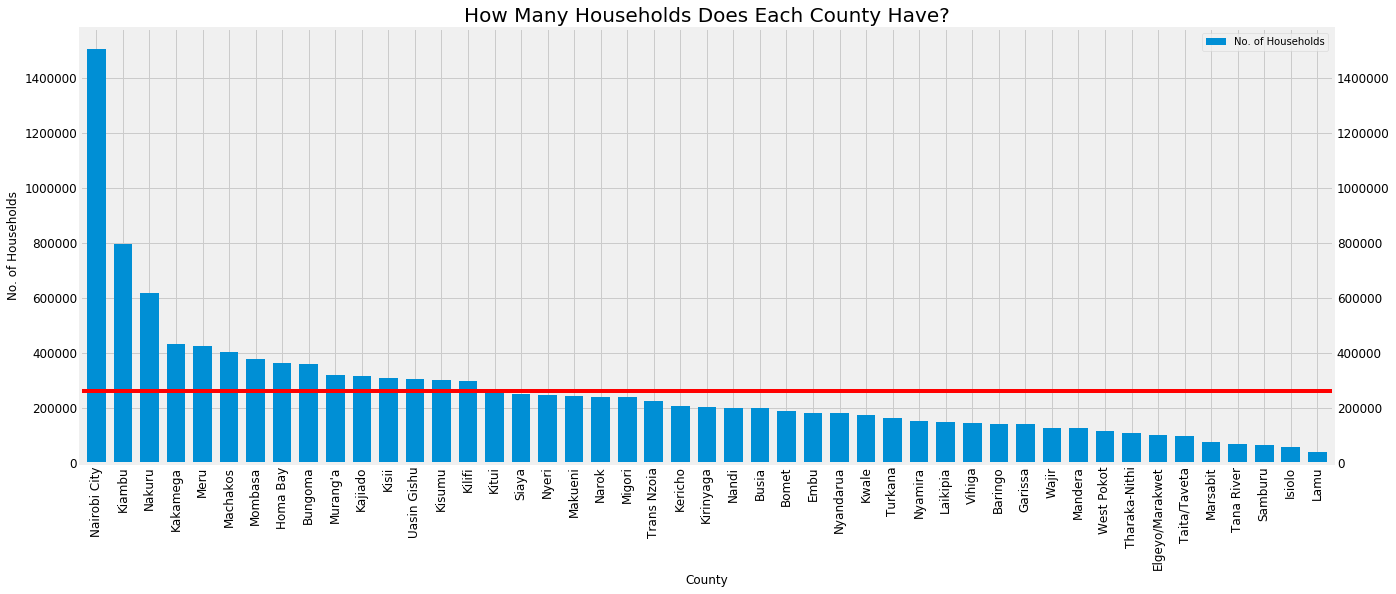

In [262]:
household.sort_values('No. of Households', inplace=True, ascending = False)
household.plot(x = 'County', y = ['No. of Households'], kind = 'bar', width=0.7, figsize=(20, 8))
plt.xlabel('County', fontsize = 12)
plt.ylabel('No. of Households', fontsize = 12)
plt.title('How Many Households Does Each County Have?', fontsize = 20)
plt.axhline(y=260508, color='r', linestyle='-')
plt.tick_params(labelsize=12, labelright=True)

In general, the higher the population per county the higher the number of households.

In [288]:
# taking some mean values to help in plotting the next graph
household['No. of Households'].mean()

260508.78723404257

In [289]:
household['Ave. Household size'].mean()

4.231914893617021

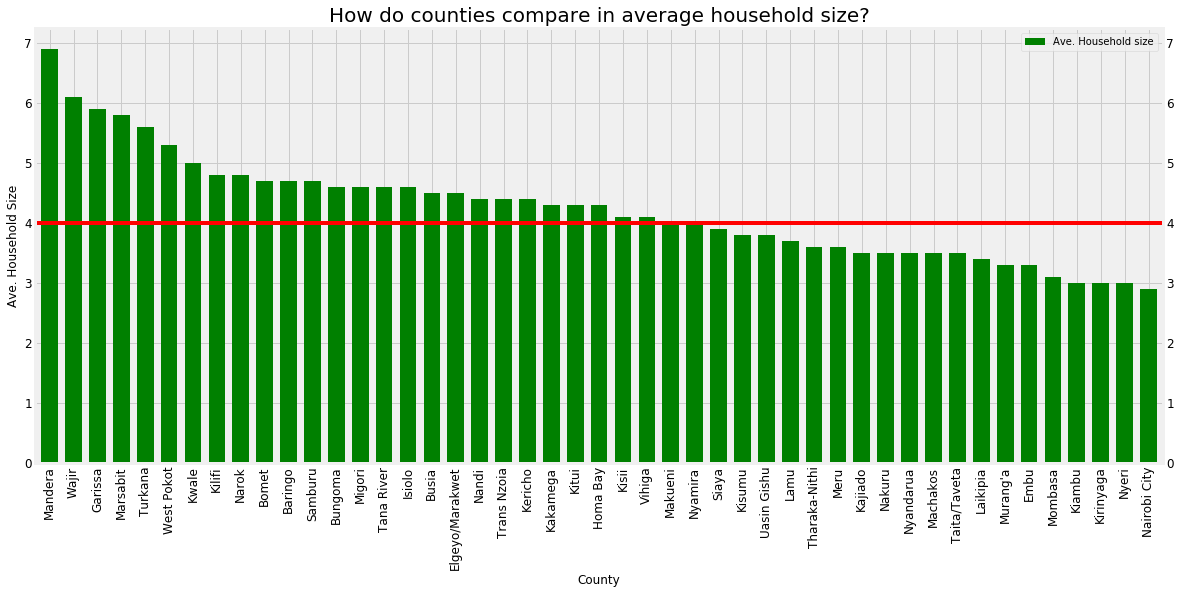

In [287]:
# plotting average household size per county
household.sort_values('Ave. Household size', inplace=True, ascending = False)
household.plot(x = 'County', y = ['Ave. Household size'], kind = 'bar', width=0.7, color='g', figsize=(18, 8))
plt.xlabel('County', fontsize = 12)
plt.ylabel('Ave. Household Size', fontsize = 12)
plt.title('How do counties compare in average household size?', fontsize = 20)
plt.axhline(y=4, color='r', linestyle='-')
plt.tick_params(labelsize=12, labelright=True)

More than half the counties have above the mean average household size of 4.2. Counties in the arid and semi arid northern part of the county have highest average household size with Mandera leading the country at 6.9

#### Comparing average household size and the number of household per country. 
This brought out an interesting fact. Let's have a look at the graph which again uses 2 different y-axis ranges.

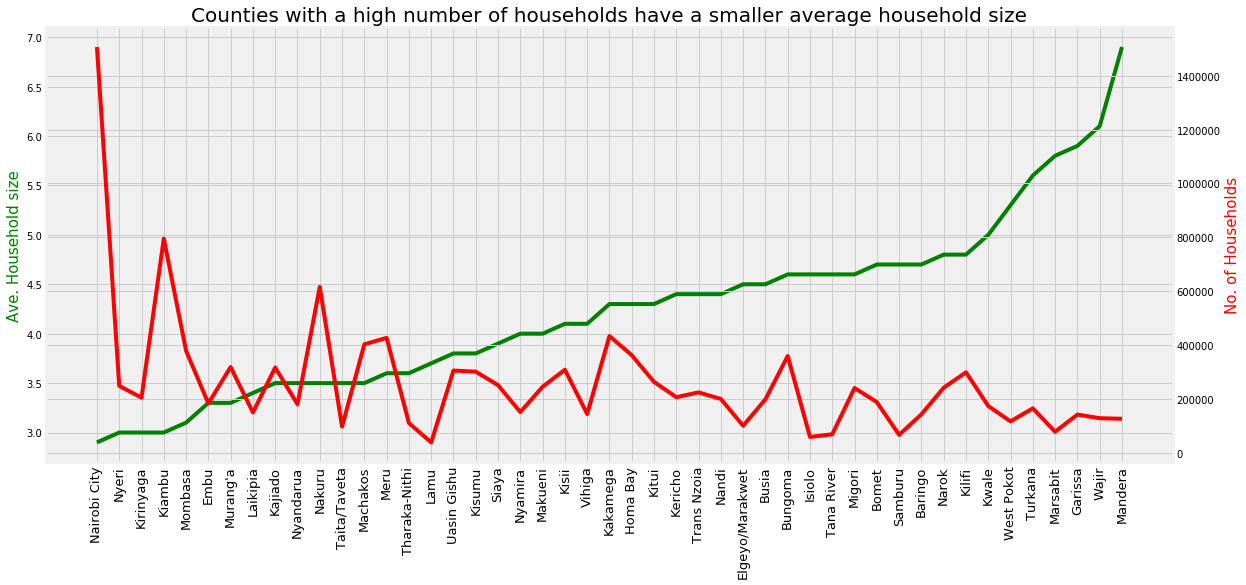

In [290]:
fig, ax = plt.subplots(figsize=(18,8))
ax2 = ax.twinx()
household.sort_values('Ave. Household size', inplace=True, ascending = False)
ax.plot(household['County'], household["Ave. Household size"], color='g', label='Ave. Household size')
ax2.plot(household['County'], household["No. of Households"], color='r')
ax.set_xticklabels(household['County'], rotation=90, fontsize = 13)
#ax.legend(loc='1')
plt.title('Counties with a high number of households have a smaller average household size', fontsize = 20)
ax.set_ylabel('Ave. Household size', color='g', fontsize = 15)
ax2.set_ylabel('No. of Households', color='r', fontsize = 15)
plt.gca().invert_xaxis()

Clearly, counties with the least number of households have the highest average household size. It's kind of a compensation.
For instance Nairobi has 1,506,888 households (the highest), but the least average household size of 2.9. Is it a case of urban vs rural lifestyle, eduction levels?

##### In the graph below I normalise the No. of Household and Ave. Household size to percentages

In [293]:
# change No. of Household and Ave. Household size to percentages for easier plotting on the same y axis
household["Population."] = household["Population"] / household['Population'].max()*100
household["Ave Household size"] = household["Ave. Household size"] / household['Ave. Household size'].max()*100

In [294]:
household.head()

,County,Population,No. of Households,Ave. Household size,Population.,Ave Household size
8,Mandera,862079,125763,6.9,19.876945,100.000000
7,Wajir,775302,127932,6.1,17.876129,88.405797
6,Garissa,835482,141394,5.9,19.263698,85.507246
9,Marsabit,447150,77495,5.8,10.309932,84.057971
22,Turkana,922210,164519,5.6,21.263385,81.159420


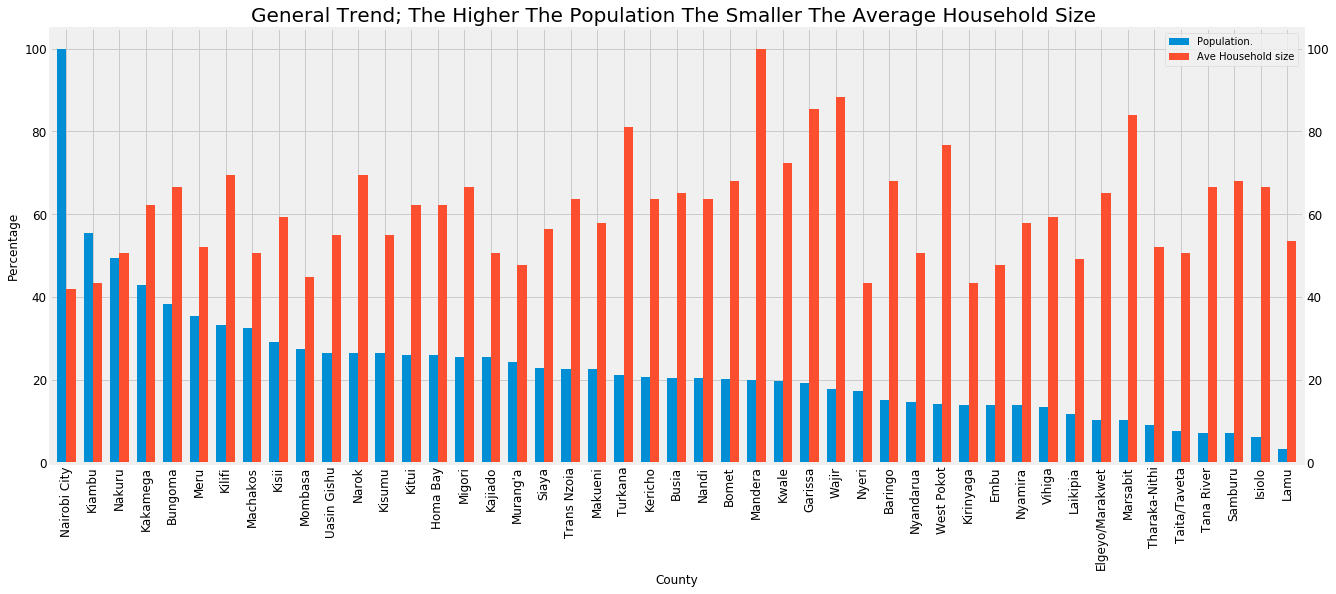

In [296]:
# plotting population and average household size in the same graph with same range of y-axis after normalization into %s.
household.sort_values('Population.', inplace=True, ascending = False)
household.plot(x = 'County', y = ['Population.', 'Ave Household size'], kind = 'bar', width=0.7, figsize=(20, 8))
plt.xlabel('County', fontsize = 12)
plt.ylabel('Percentage', fontsize = 12)
#plt.gca().invert_xaxis()
plt.title('General Trend; The Higher The Population The Smaller The Average Household Size ', fontsize = 20)
plt.tick_params(labelsize=12, labelright=True)

### 3.Distribution of Population, Land Area and Population Density by County.
#### How do counties rank in terms of land area and population density?

In [297]:
density = pd.read_excel('density.xlsx')

In [298]:
density.head()

,County,Population,Land Area (Sq. Km),Population Density
0,Mombasa,1208333,219.9,5495
1,Kwale,866820,8267.1,105
2,Kilifi,1453787,12539.7,116
3,Tana River,315943,37950.5,8
4,Lamu,143920,6253.3,23


Let's graph 

In [232]:
density['Land Area (Sq. Km)'].mean()

12359.074468085111

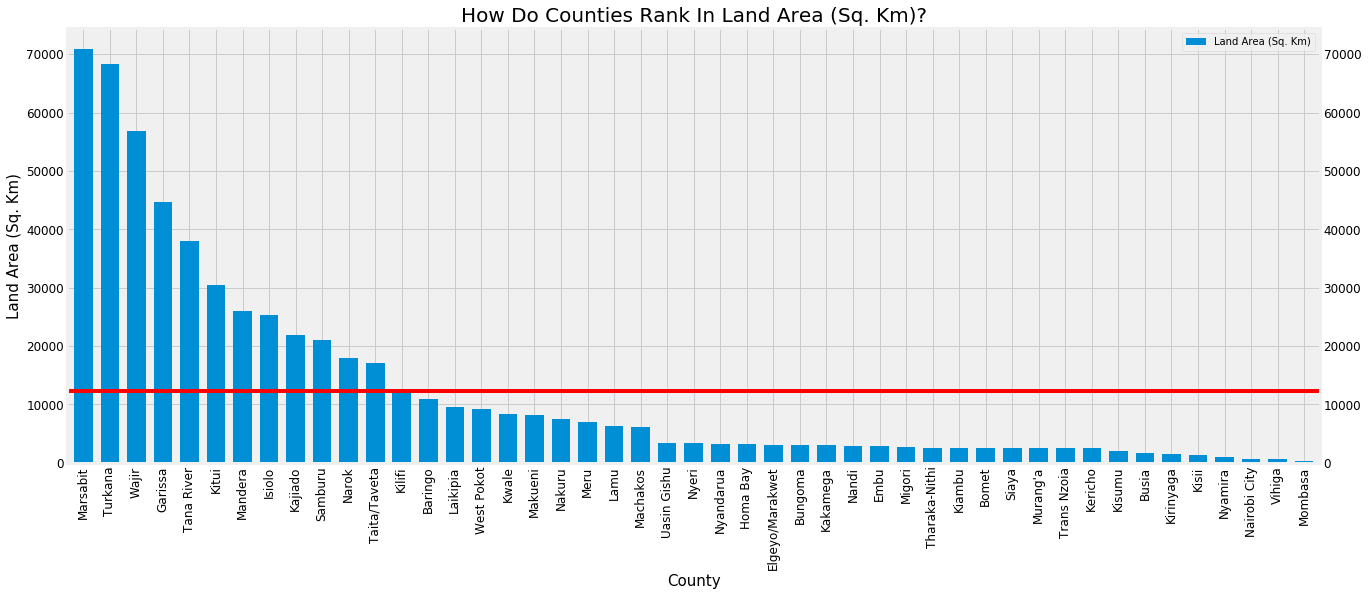

In [246]:
# plotting land area per county
density.sort_values('Land Area (Sq. Km)', inplace=True, ascending = True)
density.plot(x = 'County', y = ['Land Area (Sq. Km)'], kind = 'bar', width=0.7, figsize=(20, 8))
plt.ylim(-15) # I lowered the y limit to -15 from 0 to allow visualisation of bars representing very small figures
plt.gca().invert_xaxis()
plt.xlabel('County', fontsize = 15)
plt.ylabel('Land Area (Sq. Km)', fontsize = 15)
plt.title('How Do Counties Rank In Land Area (Sq. Km)?', fontsize = 20)
plt.axhline(y=12359, color='r', linestyle='-') 
plt.tick_params(labelsize=12, labelright=True)
plt.legend()
plt.show()

Marsabit country have the largest land area (sq. km) at 70944.1. Together with Turkana, Wajir, Garissa and Tana River they make the top 5 list.
If you add Kitui, then those 6 counties combined have more than half the total land area (sq. km) of Kenya, at 309,066.
I added the a mark of the average land area (sq. km). At 12,359, most countries are below it. You could call the top 6 counties outliers that skewed the average mark. 

#### In the graph below I wanted to see how population is distributed per county and compare it with county size.
Again this brought out an interesting fact. Let's look at it.

In [167]:
density['Population Density'].mean()

509.1489361702128

In [201]:
density['Population Density'].max()

6247

No handles with labels found to put in legend.


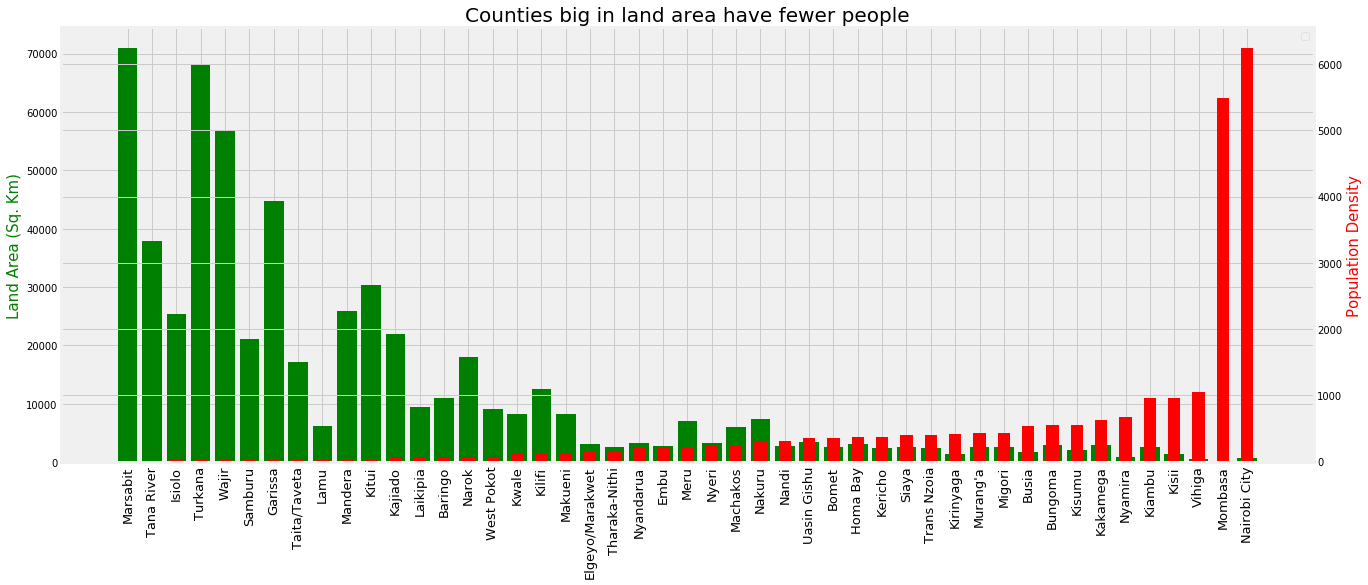

In [228]:
# plotting population density vs land area (sq km) in the same graph with different ranges of the 2 y-axes.
fig, ax = plt.subplots(figsize=(20,8))
ax2 = ax.twinx()
density.sort_values('Population Density', inplace=True, ascending = True)
ax.bar(density['County'], density["Land Area (Sq. Km)"], color='g')
ax2.bar(density['County'], density["Population Density"], color='r', width=0.5) #reduced bar-width to prevent overlap of bars
ax.set_xticklabels(density['County'], rotation=90, fontsize = 13)
plt.title('Counties big in land area have fewer people', fontsize = 20)
ax.set_ylabel('Land Area (Sq. Km)', color='g', fontsize = 15)
ax2.set_ylabel('Population Density', color='r', fontsize = 15)
plt.ylim(-15)
plt.legend()
plt.show()

Interesting people are more in the smaller counties in land area(sq. km)! This is definitely due to obvious factors among them being;
1) Counties with low population density are in the arid and semi arid belt and tend to be big in land area. 
2) The most populous counties are along the highlands and agricultural belts of the country which is still an agrarian ecomony.
As per the World Bank, 27% of Kenyans live in urban areas and a majority of those are in the 2 major cities of Nairobi and Mombasa.
Vihiga county stood out for me for this reason; it's a rural country, it has 2nd smallest land area but 3rd highest population density.


#### In the graph below I again normalise Land Area and Population Density to percentages to have same range on both y-axes.
Unlike the graph above I arranged the Land Area in descending order this time.

In [237]:
density["Land Area"] = density["Land Area (Sq. Km)"] / density['Land Area (Sq. Km)'].max()*100
density["Population Density."] = density["Population Density"] / density['Population Density'].max()*100

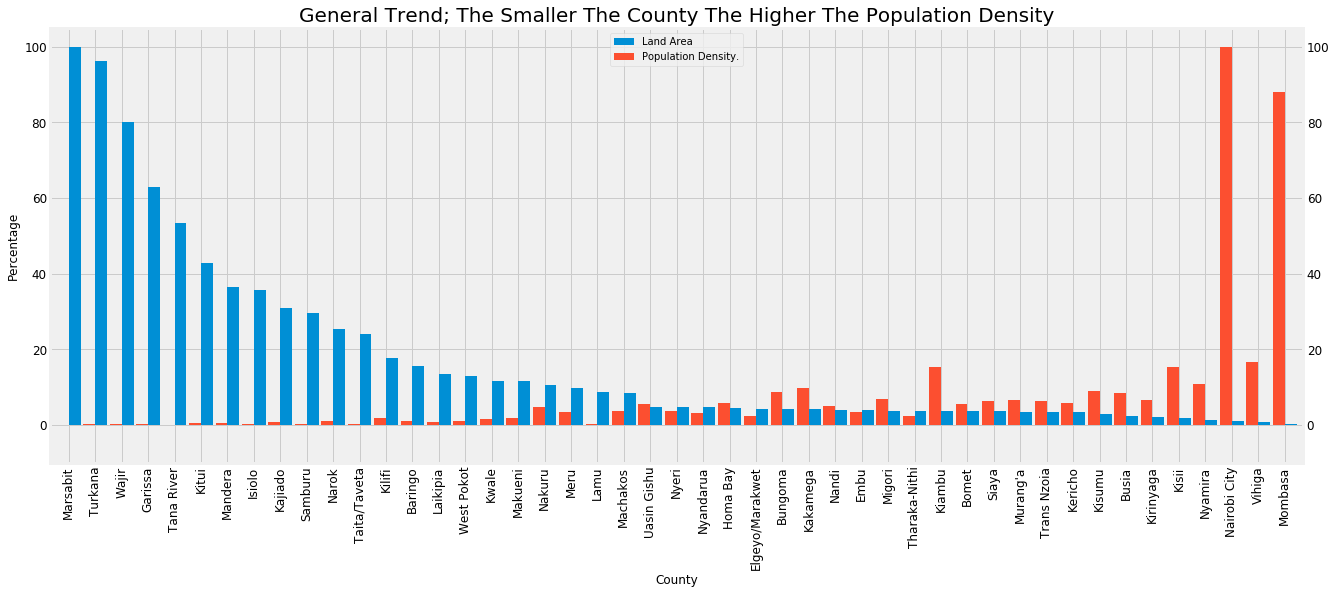

In [249]:
density.plot(x = 'County', y = ['Land Area', 'Population Density.'], kind = 'bar', width=0.9, figsize=(20, 8))
plt.xlabel('County', fontsize = 12)
plt.gca().invert_xaxis() # this is to invert the 2 bars to start from left or right.
plt.ylim(-10)
plt.ylabel('Percentage', fontsize = 12)
plt.title('General Trend; The Smaller The County The Higher The Population Density', fontsize = 20)
plt.tick_params(labelsize=12, labelright=True)
plt.legend()
plt.show()

This is a testament to growing urban population recorded in other reports. According to the World Bank, Kenya’s urbanization seems to be driven by agricultural push rather than industrial pull, but with some elements of the consumption cities channel.
Fortunately, Kenya is at an early stage of urbanization, but by 2050 about half of the population will be living in cities. 
Around 27 percent of Kenyans live in urban areas, and Kenya is urbanizing at about 4.3 percent a year.


## The END

Further work is ongoing by the Kenya National Bureau of Statistics to produce basic and in-depth analytical topical reports on the Census. In the next project I will be looking at those reports for an indepth analysis and to make statistical deductions and predictions.  